In [14]:
from src.l_curve import create_L_curve
import matplotlib.pyplot as plt
import pandas as pd
import os
import firedrake

In [15]:
def plot_lcurve(l_curve,loglog=False):
    # Plot
    plt.figure(figsize=(10, 6))

    # Plot scatter points
    if loglog:
        plt.loglog(l_curve['J1'], l_curve['J2'], marker='o', linestyle='', label='Regularization constant')
    else:
        plt.plot(l_curve['J1'], l_curve['J2'], marker='o', linestyle='', label='Regularization constant')

    # Plot line connecting the points
    if loglog:
        plt.loglog(l_curve['J1'], l_curve['J2'], marker='', linestyle='-')
    else:
        plt.plot(l_curve['J1'], l_curve['J2'], marker='', linestyle='-')

    # Annotate points with regularization values
    for i, txt in enumerate(l_curve['Regularization Constant']):
        plt.annotate(txt, (l_curve['J1'][i], l_curve['J2'][i]))

    plt.xlabel('E')
    plt.ylabel('R')
    plt.title('Log-Log Plot of E vs R with Regularization Constants')
    plt.legend()
    plt.grid(True)
    plt.show()

In [16]:
variable = 'C'

In [17]:
#reg_const_list = [0.01, 0.05, 0.1, 0.5, 1, 10]
reg_const_list = [0.01, 0.05, 0.5, 10,50, 100,200]

#### Thwaites L-curve

In [ ]:
l_curve = create_L_curve(None, variable,reg_const_list = reg_const_list, outline='data/geojson/thwaites.geojson', mesh='thwaites', invert_iter = 170, workers = 4,  lcar=9e3, nosigma_lossfcn = 'nosigma', drichlet_ids = [1,2,5,6], regularization_grad_fcn = True, constant_val=0.01)

In [22]:
# data = {
#     'reg': [0.01, 0.1, 1, 10],
#     'J1': [568.5430921059252, 200.15193884090579, 125.05111469154097, 131.02607789480362],
#     'J2': [0.029821845834902418, 0.5584096178962419, 10.077985527278557, 16.01170699159037]
# }

# l_curve = pd.DataFrame(data)
l_curve_thwaites = l_curve.sort_values('Regularization Constant')
l_curve_thwaites_2 = l_curve_thwaites.copy()
l_curve_thwaites_2['J2'] = l_curve_thwaites_2['J2']/(l_curve_thwaites_2['Regularization Constant']**2)

In [25]:
l_curve_thwaites

,Regularization Constant,J1,J2
0,0.01,1095.356771,0.037554
1,0.05,733.725504,0.236948
2,0.50,750.827898,3.648451
3,10.00,853.835188,4.213217
4,50.00,2127.294108,3.182796
5,100.00,5394.884914,2.761383
6,200.00,1026.857326,3.688296


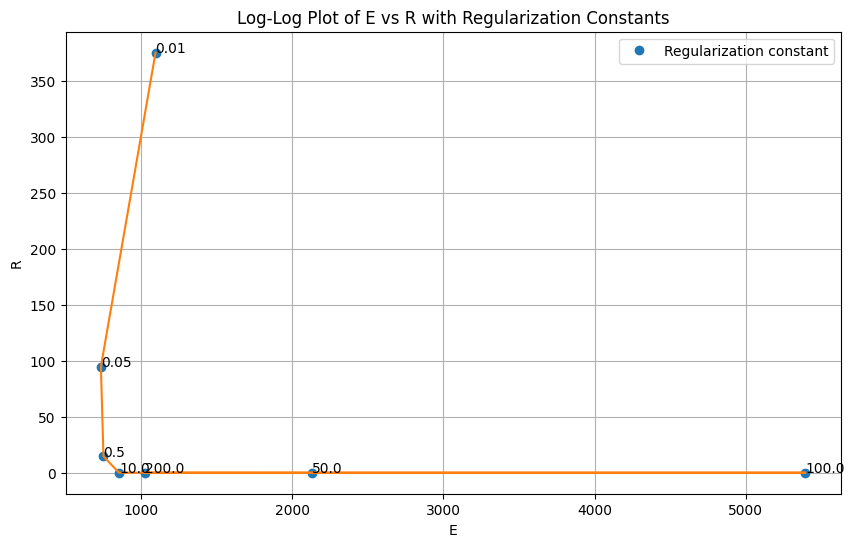

In [23]:
plot_lcurve(l_curve_thwaites_2, loglog=False)

#### Dotson L-curve

In [ ]:
l_curve = create_L_curve(None, variable,reg_const_list = reg_const_list, outline='data/geojson/dotson-crosson.geojson', mesh='dotson', invert_iter = 300, workers = 4,  lcar=9e3, nosigma_lossfcn = 'nosigma', drichlet_ids = [1,2,5,6,7,8,9,10,11], regularization_grad_fcn = True, constant_val=0.01)

In [ ]:

# data = {
#     'Regularization Constant': [0.01, 0.1, 1, 10, 100],
#     'J1': [2267.6773361353717, 1048.1822885449558, 920.1322010148269, 3572.6007040486306, 3571.8336010333956],
#     'J2': [0.08733750798441621, 1.5586142772894822,27.761524638326396, 23.613921786056103, 23.61655309695598]
# }

#l_curve = pd.DataFrame(data)
l_curve_dotson = l_curve.sort_values('Regularization Constant')
l_curve_dotson_2 = l_curve_dotson.copy()
l_curve_dotson_2['J2'] = l_curve_dotson_2['J2']/(l_curve_dotson_2['Regularization Constant']**2)

In [26]:
l_curve_dotson

,Regularization Constant,J1,J2
0,0.01,2237.817219,0.094571
1,0.05,1248.372044,0.639612
2,0.50,4656.050792,25.353643
3,10.00,3804.636978,26.344633
4,50.00,4254.120434,26.274422
5,100.00,4254.126232,26.274515
6,200.00,4254.127676,26.274538


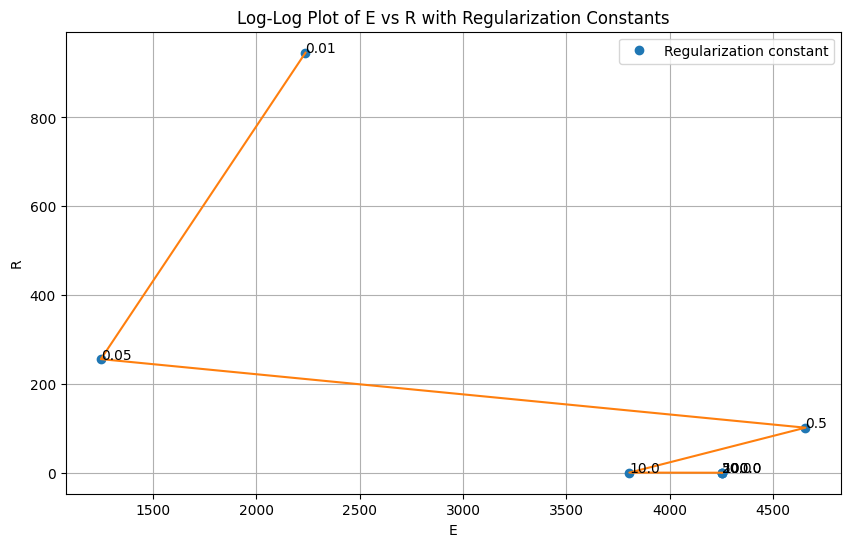

In [20]:
plot_lcurve(l_curve_dotson_2, loglog=False)

#### Pine Island L Curve

In [ ]:
l_curve = create_L_curve(None, variable,reg_const_list = reg_const_list, outline= 'pine-island', mesh = 'pig', invert_iter = 300, workers = 4,  lcar=9e3, nosigma_lossfcn = 'nosigma', drichlet_ids = [2,3,4], regularization_grad_fcn = True, constant_val=0.01)

In [12]:
l_curve_pine_island = l_curve.sort_values('Regularization Constant')
l_curve_pine_island_2 = l_curve_pine_island.copy()
l_curve_pine_island_2['J2'] = l_curve_pine_island_2['J2']/(l_curve_pine_island_2['Regularization Constant']**2)

In [27]:
l_curve_pine_island

,Regularization Constant,J1,J2
0,0.01,12474.909600,0.186127
1,0.05,9942.626423,1.283508
2,0.10,9599.307884,2.628239
3,0.50,26239.358003,4.277496
4,1.00,27626.241455,4.579785
5,10.00,28889.890218,4.057443


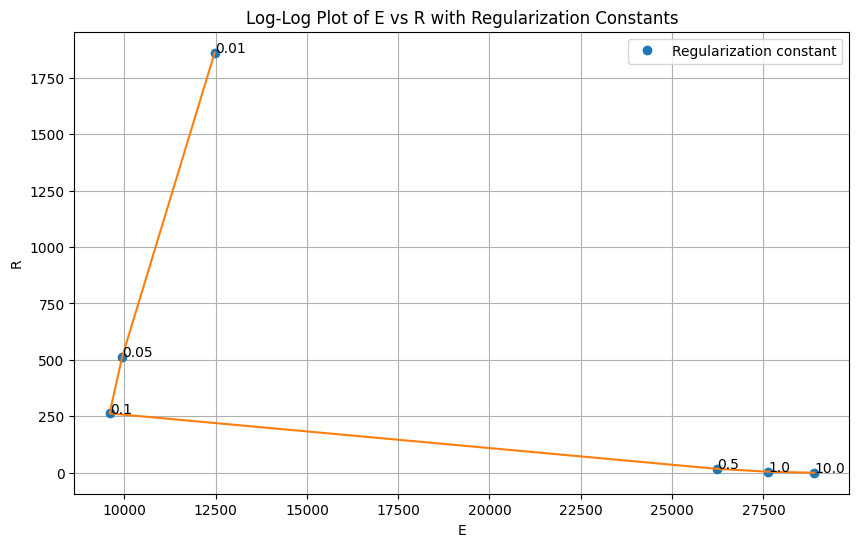

In [13]:
plot_lcurve(l_curve_pine_island_2, loglog=False)